In [1]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import os
from PIL import *
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image
import json
import random
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet import ResNet152
from keras.applications.inception_v3 import InceptionV3
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, ReLU, MaxPool2D,InputLayer
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU   
from keras import optimizers, regularizers
from sklearn.metrics import classification_report
from keras.callbacks import TensorBoard
import datetime
import imgaug.augmenters as iaa
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input

import sys
# sys.stdout = open('./code/adapted_deep_embeddings/log.txt','wt')



Using TensorFlow backend.


In [2]:


def check_num_each_class(train_y, test_y, val_y):
    zero, one, two, three, four = 0, 0, 0, 0, 0
    for e in train_y:
        if e == 0:
            zero += 1
        elif e == 1:
            one += 1
        elif e == 2:
            two += 1
        elif e == 3:
            three += 1
        elif e == 4:
            four += 1

    print("each classes has # images in train:\n")
    print(zero, one, two, three, four)

    zero, one, two, three, four = 0, 0, 0, 0, 0
    for e in test_y:
        if e == 0:
            zero += 1
        elif e == 1:
            one += 1
        elif e == 2:
            two += 1
        elif e == 3:
            three += 1
        elif e == 4:
            four += 1

    print("each classes has # images in test:\n")
    print(zero, one, two, three, four)

    zero, one, two, three, four = 0, 0, 0, 0, 0
    for e in val_y:
        if e == 0:
            zero += 1
        elif e == 1:
            one += 1
        elif e == 2:
            two += 1
        elif e == 3:
            three += 1
        elif e == 4:
            four += 1

    print("each classes has # images in val:\n")
    print(zero, one, two, three, four)

'''
CBR model
'''
# def get_model(input_shape):
#   kernel_size = 7
#   model = Sequential([
#     InputLayer(input_shape=input_shape),
#     Conv2D(32,kernel_size ),
#     BatchNormalization(),
#     ReLU(),
#     MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#     Conv2D(64,kernel_size , input_shape=input_shape),
#     BatchNormalization(),
#     ReLU(),
#     MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#      Conv2D(128,kernel_size , input_shape=input_shape),
#     BatchNormalization(),
#     ReLU(),
#     MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#      Conv2D(256,kernel_size , input_shape=input_shape),
#     BatchNormalization(),
#     ReLU(),
#     MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#      Conv2D(512,kernel_size , input_shape=input_shape),
#     BatchNormalization(),
#     ReLU(),
#     GlobalAveragePooling2D(),
#     Dense(5, activation='sigmoid'),
#   ])
#   return model


# '''
# resnet50
# '''
# def get_model(input_shape):
  
#   base_model =ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
#   #for layer in  base_model.layers[:10]:
#     #layer.trainable = False
#     #layer.padding='same'
 
#   #for layer in  base_model.layers[10:]:
#     #layer.trainable = True
#     #layer.padding='same'
    
# #   x = base_model.get_layer('avg_pool').output
#   x = base_model.output
#   x = GlobalAveragePooling2D()(x)
#   # x = BatchNormalization()(x)
# #   x = Dropout(0.5)(x)

# #   x = Flatten() (x)
# #   x = Dropout(0.5)(x)
#   # x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
# #   # x = BatchNormalization()(x)
# #   x = Dropout(0.5)(x)
# #   x = Dense(32, activation='relu')(x)
#   # x = Dense(128, activation='relu')(x)
#   # x = Dropout(0.5)(x)
#   x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
# #   x = Dense(512, activation='relu')(x)
#   # x = LeakyReLU(alpha=0.1)(x)
    
#   x = Dropout(0.3)(x)
#   #x = Dense(5, activation='softmax')(x)
#   #model = Model(base_model.input, x)
#   predictions = Dense(5, activation='softmax')(x)
#   model = Model(inputs=base_model.input, outputs=predictions)
# #   for layer in model.layers[:-2]:
# #     layer.trainable = False

#   return model

'''
VGG16
'''
# def get_model(input_shape):
  
#   image_input = Input(shape = (224,224, 3))
#   model = VGG16(input_tensor = image_input, weights = 'imagenet')
#   # model = ResNet50(weights='imagenet', include_top=False, input_tensor = image_input)
#   # model.summary()
#   last_layer = model.get_layer('block5_pool').output
#   x = Flatten(name='flatten')(last_layer)
#   x = Dense(128, activation='relu', name='fc1')(x)
#   x = Dense(128, activation='relu', name='fc2')(x)
#   out = Dense(5, activation='softmax', name='output')(x)
#   custom_vgg_model2 = Model(image_input, out)
#   for layer in custom_vgg_model2.layers[:-3]:
#     layer.trainable = False

#   return custom_vgg_model2

def split_data(data_dict):
    trainset = []
    valset = []
    testset=[]
    for label, images in data_dict.items():
        random.shuffle(images) #shuffle each class
        img_train, img_test = train_test_split(images, test_size=0.2)
        img_train, img_val = train_test_split(img_train,test_size=0.2)
        trainset = trainset + img_train
        valset = valset + img_val
        testset = testset + img_test
    
    #three dataset are stored in order data[class0, class1 ... class4]
    #will do futher shuffle 
    return trainset, valset, testset

'''
output dataset like
data = {
        0:[[class_0_nparray, label_0]],
        1:[[class_1_nparray, label_1]],
        2:[[class_2_nparray, label_2]],
        3:[[class_3_nparray, label_3]],
        4:[[class_4_nparray, label_4]]
    }
'''
def create_data(images_dict):
    data = {
        0:[],
        1:[],
        2:[],
        3:[],
        4:[]
    }
    for label, img_paths in images_dict.items():
        for img_path in img_paths:
            img = image.load_img(img_path, target_size=(224,224))
            img = image.img_to_array(img)
#             features = preprocess_input(img,  mode='tf', data_format='channels_last')
#             img = img.astype('float32') / 255.0
            data[label].append([img, label])

    return data

'''
custom data augmentation
'''
def create_custom_gen(img_gen):
    seq = iaa.Sequential([
        iaa.MultiplyHue((0.5, 1.5)),
        iaa.imgcorruptlike.Contrast(severity=1)
    ])
    for X_batch, y_batch in img_gen:
        hue = seq(images = X_batch.astype(np.uint8))
        yield hue.astype('float32')/255.0, y_batch


In [3]:

path_base = 'E:\\aptos\\labelsbase15.json'
classes = n = 5  #TODO:

k= 100 #TODO
# path_base = "/home/z5163479/code/base15.json"
# path_novel = "/home/z5163479/code/novel15.json"
with open(path_base, 'r') as f:
    data = json.load(f)

labels = np.array(data['image_labels'])
images = np.array(data['image_names'])

epoch = 80
NN_layer = "resnet_{}classes_SparseCross_sigmoid_{}_epoch{}_imagenet".format(classes,k,epoch) #TODO
BS = 16 #batch size
print(NN_layer)

zero_images = images[labels == 0][:k]
one_images = images[labels == 1][:k]
two_images = images[labels == 2][:k]
three_images = images[labels == 3][:k]
four_images1 = images[labels == 4][:k]

# add more data for class 4
four_images2 = []

if len(four_images1) < k :
    path_base = 'E:\\aptos\\labelsnovel15.json'
    print("adding image from second dataset\n")
#     path_novel = "/home/z5163479/code/novel15.json"
    with open(path_base, 'r') as f:
        add_data = json.load(f)
    add_labels = np.array(add_data['image_labels'])
    add_images = np.array(add_data['image_names'])
    n = k - len(four_images1)
    four_images2 = add_images[add_labels == 4][:n]

four_images = [y for x in [four_images1, four_images2] for y in x]

print("0 images: {}, four images: {}".format(len(zero_images), len(four_images)))
print("1 images: {}, two images: {}, three images: {}".format(len(one_images), len(two_images), len(three_images)))
trainset = {
    0:zero_images,
    1:one_images,
    2:two_images,
    3:three_images,
    4:four_images
}

path_base = 'E:\\aptos\\public15.json'
# path_base = 'E:\\aptos\\private15.json'
with open(path_base, 'r') as f:
    data = json.load(f)

test_labels = np.array(data['image_labels'])
test_images = np.array(data['image_names'])

c = 10
zero = test_images[test_labels == 0][:c]
one = test_images[test_labels == 1][:c]
two = test_images[test_labels == 2][:c]
three = test_images[test_labels == 3][:c]
four = test_images[test_labels == 4][:c]
# print("0 images: {}, four images: {}".format(len(zero), len(four)))
# print("1 images: {}, two images: {}, three images: {}".format(len(one), len(two), len(three)))

testset = {
    0:zero,
    1:one,
    2:two,
    3:three,
    4:four
}

resnet_5classes_SparseCross_sigmoid_100_epoch80_imagenet
0 images: 100, four images: 100
1 images: 100, two images: 100, three images: 100


In [4]:
def get_data(images_dict):
  dataset = []
  for label, img_paths in images_dict.items():
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224,224))
        img = image.img_to_array(img)
#             features = preprocess_input(img,  mode='tf', data_format='channels_last')
#             img = img.astype('float32') / 255.0
        dataset.append([img, label])

  return dataset

In [6]:

img_train = get_data(trainset)
img_test = get_data(testset)
# img_train, val_test, img_test = split_data(data)

# print(len(val_test))
print(len(img_train))
print(len(img_test))
# val_size = len(val_test)
train_size = len(img_train)
test_size = len(img_test)
# assert val_size + train_size + test_size == k * classes

'''
Split three datasets into X and Y two arrays
    - shuffle each dataset, then split
    - use resnet50 data preprocess method to preprocess X
'''
# val_x = []
# val_y = []
# random.shuffle(val_test) 
# for features, label in val_test:
# #     features = preprocess_input(features,  mode='torch', data_format='channels_last')
#     val_x.append(features)
#     val_y.append(label)

# val_x=np.array(val_x).reshape(val_size,224,224,3)
# val_x = val_x.astype('float32') / 255.0

train_x = []
train_y = []
random.shuffle(img_train)
for features, label in img_train:
#     features = preprocess_input(features)
    train_x.append(features)
    train_y.append(label)

train_x=np.array(train_x).reshape(train_size,224,224,3)
# train_x = train_x.astype('float32') / 255.0

test_x = []
test_y = []
random.shuffle(img_test)
for features, label in img_test:
#     features = preprocess_input(features)
    test_x.append(features)
    test_y.append(label)

test_x=np.array(test_x).reshape(test_size,224,224,3)
# test_x = test_x.astype('float32')/255.0


500
50


In [7]:
index, count = np.unique(test_y, return_counts=True)
print(index, count)

index, count = np.unique(train_y, return_counts=True)
print(index, count)



[0 1 2 3 4] [10 10 10 10 10]
[0 1 2 3 4] [100 100 100 100 100]


In [8]:
train_y=to_categorical(train_y)
test_y=to_categorical(test_y)
# val_y=to_categorical(val_y)

In [9]:
print(train_x.max(), train_x.min(), train_x.mean(), train_x.std())
# print(val_x.max(), val_x.min(), val_x.mean(), val_x.std())
print(test_x.max(), test_x.min(), test_x.mean(), test_x.std())

print(test_x.shape)
print(train_x.shape)

255.0 0.0 78.7741 59.578827
255.0 0.0 87.871414 61.65179
(50, 224, 224, 3)
(500, 224, 224, 3)


In [10]:

'''
resnet50
'''
def get_model(input_shape):
  
  base_model =ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
  #for layer in  base_model.layers[:10]:
    #layer.trainable = False
    #layer.padding='same'
  #for layer in  base_model.layers[10:]:
    #layer.trainable = True
    #layer.padding='same'
    
#   x = base_model.get_layer('avg_pool').output
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  # x = BatchNormalization()(x)
#   x = Dropout(0.5)(x)

#   x = Flatten() (x)
#   x = Dropout(0.5)(x)
  # x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
#   x = BatchNormalization()(x)
#   x = Dropout(0.5)(x)
#   x = Dense(32, activation='relu')(x)
  x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)
  x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)
#   x = Dense(512, activation='relu')(x)
  # x = LeakyReLU(alpha=0.1)(x)
    
#   x = Dropout(0.3)(x)
  #x = Dense(5, activation='softmax')(x)
  #model = Model(base_model.input, x)
  predictions = Dense(5, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
#   for layer in model.layers[:-8]:
#     layer.trainable = False

  return model

model50 = get_model(input_shape=(224,224,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



C:\Users\clc87\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [11]:
epoch = 80
BS = 16 #batch size

'''
Image augmentation
'''
image_gen = ImageDataGenerator(
#                               rescale=1./255
#                             rotation_range=45,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
#                             zoom_range=0.2,
#                             shear_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=True,
#                             fill_mode='nearest'
                           data_format='channels_last'
                           )

img_gen=image_gen.flow(train_x, train_y, batch_size=BS, shuffle=True)
# img_gen = create_custom_gen(img_gen)

test_datagen = ImageDataGenerator(
                                )

# val_gen=test_datagen.flow(val_x, val_y, batch_size=16, shuffle=False)
test_gen=test_datagen.flow(test_x, test_y, batch_size=20, shuffle=False)

# check_num_each_class(train_y, test_y, val_y)

# model50.summary()
adam = optimizers.Adam(lr=0.001)
# sgd2 = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)

model50.compile(
#                 optimizer=adam,
                  optimizers.RMSprop(lr=2e-5),
#                 optimizer=sgd2,
#                     loss='categorical_crossentropy',
                    # loss='kullback_leibler_divergence',
                    loss= 'binary_crossentropy',
                    metrics=['acc'])
# Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'cate'
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=0,
                      write_graph=True, write_images=False)

'''
fine-tune some conv layers
'''
# # # train_model=model50.fit(train_x, train_y, batch_size=8,epochs=epoch,verbose=1,validation_data=(val_x, val_y), callbacks=[tensorboard])
# # train_model = model50.fit_generator(img_gen, validation_data=(val_x, val_y), epochs=10, steps_per_epoch=len(train_x)//BS, verbose=1)

# # ## start train
# # for layer in model50.layers[:165]:
# #   layer.trainable = False
# # for layer in model50.layers[165:]:
# #   layer.trainable = True

# model50.compile(optimizer=optimizers.Adam(lr=1e-5)  ,
#                         # loss='binary_crossentropy',
#                         loss='sparse_categorical_crossentropy',
#                     # loss='kullback_leibler_divergence',
#                     metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


'\nfine-tune some conv layers\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 1. 0.]
255.0 0.0


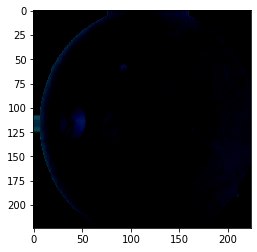

In [23]:
from matplotlib import pyplot as plt

for X_batch, y in img_gen:
  x = X_batch[0]
  print(y[0])
  print(X_batch.max(), X_batch.min())
#   x = x.astype('float32') / 255.0
  x = preprocess_input(x, data_format='channels_last')
  plt.imshow(x.astype('int'))
  plt.show()
  break

In [29]:
# model50.fit_generator(img_gen, validation_data=(val_x, val_y), epochs=3, steps_per_epoch=len(train_x)//BS, verbose=1)

# for layer in model50.layers[:7]:
#       layer.trainable = False
# for layer in model50.layers[7:]:
#   layer.trainable = True
# for i, layer in enumerate(model50.layers):
#    print(i, layer.name, layer.trainable)
    
model50.fit_generator(img_gen, validation_data=test_gen, epochs=150, validation_steps= len(test_x)//20,steps_per_epoch=len(train_x)//BS, verbose=1,  callbacks=[tensorboard])

Epoch 1/150
156/156 [==============================] - 31s 198ms/step - loss: 1.2210 - acc: 0.5038 - val_loss: 1.0667 - val_acc: 0.5000
Epoch 2/150
156/156 [==============================] - 25s 160ms/step - loss: 1.1975 - acc: 0.5176 - val_loss: 1.0424 - val_acc: 0.4944
Epoch 3/150
156/156 [==============================] - 25s 160ms/step - loss: 1.1823 - acc: 0.5196 - val_loss: 1.0488 - val_acc: 0.5284
Epoch 4/150
156/156 [==============================] - 25s 160ms/step - loss: 1.1565 - acc: 0.5373 - val_loss: 1.0468 - val_acc: 0.5164
Epoch 5/150
156/156 [==============================] - 25s 160ms/step - loss: 1.1527 - acc: 0.5401 - val_loss: 1.0538 - val_acc: 0.5400
Epoch 6/150
156/156 [==============================] - 25s 160ms/step - loss: 1.1381 - acc: 0.5480 - val_loss: 1.0464 - val_acc: 0.5548
Epoch 7/150
156/156 [==============================] - 25s 160ms/step - loss: 1.1253 - acc: 0.5575 - val_loss: 0.9938 - val_acc: 0.5592
Epoch 8/150
156/156 [===========================

Epoch 61/150
156/156 [==============================] - 25s 158ms/step - loss: 0.6700 - acc: 0.8121 - val_loss: 0.6448 - val_acc: 0.7992
Epoch 62/150
156/156 [==============================] - 25s 159ms/step - loss: 0.6728 - acc: 0.8092 - val_loss: 0.6523 - val_acc: 0.8040
Epoch 63/150
156/156 [==============================] - 25s 159ms/step - loss: 0.6559 - acc: 0.8163 - val_loss: 0.6541 - val_acc: 0.7956
Epoch 64/150
156/156 [==============================] - 25s 158ms/step - loss: 0.6631 - acc: 0.8103 - val_loss: 0.6868 - val_acc: 0.7896
Epoch 65/150
156/156 [==============================] - 25s 159ms/step - loss: 0.6580 - acc: 0.8170 - val_loss: 0.6616 - val_acc: 0.8056
Epoch 66/150
156/156 [==============================] - 25s 159ms/step - loss: 0.6481 - acc: 0.8237 - val_loss: 0.7174 - val_acc: 0.7988
Epoch 67/150
156/156 [==============================] - 25s 159ms/step - loss: 0.6392 - acc: 0.8215 - val_loss: 0.6734 - val_acc: 0.7916
Epoch 68/150
156/156 [===================

(loss, accuracy) = model50.evaluate(train_x.astype('float32') / 255.0, train_y, batch_size=64, verbose=1)
print( 'loss = {:.4f}, accuracy: {:.4f}%'.format(loss,accuracy*100))

(loss, accuracy) = model50.evaluate(test_x, test_y, batch_size=64, verbose=1)
print( 'loss = {:.4f}, accuracy: {:.4f}%'.format(loss,accuracy*100))

In [20]:
test_pred = model50.predict(test_x, verbose=1, batch_size=64).argmax(axis=1)
test_true=test_y.argmax(axis=1) 
print(classification_report(test_true, test_pred, target_names=["0","1","2","3","4"]))

500/500 [==============================] - 3s 6ms/step
              precision    recall  f1-score   support

           0       0.40      0.49      0.44       100
           1       0.33      0.43      0.38       100
           2       0.30      0.25      0.27       100
           3       0.52      0.43      0.47       100
           4       0.70      0.58      0.63       100

   micro avg       0.44      0.44      0.44       500
   macro avg       0.45      0.44      0.44       500
weighted avg       0.45      0.44      0.44       500



In [10]:
test_pred = model50.predict(test_x, verbose=1, batch_size=64).argmax(axis=1)
test_true=test_y.argmax(axis=1) 
print(classification_report(test_true, test_pred, target_names=["0","1","2","3","4"]))

500/500 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.41      0.30      0.34       100
           1       0.34      0.54      0.42       100
           2       0.26      0.21      0.23       100
           3       0.53      0.54      0.54       100
           4       0.64      0.54      0.59       100

   micro avg       0.43      0.43      0.43       500
   macro avg       0.44      0.43      0.42       500
weighted avg       0.44      0.43      0.42       500



In [11]:
test_pred = model50.predict(train_x, verbose=1, batch_size=64).argmax(axis=1)
test_true=train_y.argmax(axis=1) 
print(classification_report(test_true, test_pred, target_names=["0","1","2","3","4"]))

1600/1600 [==============================] - 5s 3ms/step
              precision    recall  f1-score   support

           0       0.51      0.71      0.59       320
           1       0.48      0.70      0.57       320
           2       0.61      0.34      0.44       320
           3       0.73      0.51      0.60       320
           4       0.84      0.73      0.78       320

   micro avg       0.60      0.60      0.60      1600
   macro avg       0.63      0.60      0.60      1600
weighted avg       0.63      0.60      0.60      1600

